Here we generate fake data using CTGAN. I'm using material from https://www.youtube.com/watch?v=Ei0klF38CNs. 





# Requirements

CTGAN (Conditional Generative Adversarial Network) is a generative adversarial network (GAN) that generates synthetic data samples that are conditioned on real-world attributes, such as demographic characteristics or environmental conditions. CTGAN is a Python library that can be used to generate synthetic datasets that can be used to perform machine learning experiments, or for other applications where data privacy is a concern.

Table Evaluator is a Python library that provides utility functions for evaluating the quality of synthetic data generated by data generators such as CTGAN. The library provides functions for calculating metrics like mean squared error, mean absolute error, and others, between the synthetic and real data, which can be used to assess the quality and realism of the synthetic data.

In [ ]:
!pip install ctgan
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 73.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of table-evaluator to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


**DONT FORGET TO RESTART RUNTIME**

In [ ]:
from ctgan import CTGAN

In [ ]:
from table_evaluator import TableEvaluator

In [ ]:
!gdown 1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ

Downloading...
From: https://drive.google.com/uc?id=1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 57.2MB/s]


# Data

In [ ]:
import pandas as pd
data=pd.read_csv('./insurance.csv')

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
categorical_features=['age','sex','children','smoker','region']

# Training

In order to generate new data using GANs, you must train both a generator and a discriminator. GANs, or generative adversarial networks, are called that because they consist of two neural networks that are trained to work against each other. The "generative" part of the name refers to one of the networks, called the generator, which is trained to generate new examples that are similar to a set of training examples. The "adversarial" part of the name refers to the other network, called the discriminator, which is trained to distinguish the generated examples from the true examples in the training set.



In [ ]:
ctgan = CTGAN(verbose=True)

ctgan.fit(data, categorical_features, epochs=200)

Epoch 1, Loss G:  1.7965,Loss D: -0.0030
Epoch 2, Loss G:  1.8420,Loss D: -0.0011
Epoch 3, Loss G:  1.8330,Loss D: -0.0133
Epoch 4, Loss G:  1.8017,Loss D: -0.0171
Epoch 5, Loss G:  1.7240,Loss D: -0.0377
Epoch 6, Loss G:  1.7183,Loss D: -0.0184
Epoch 7, Loss G:  1.7853,Loss D: -0.0142
Epoch 8, Loss G:  1.7771,Loss D: -0.0343
Epoch 9, Loss G:  1.6861,Loss D: -0.0738
Epoch 10, Loss G:  1.8220,Loss D: -0.0366
Epoch 11, Loss G:  1.7345,Loss D: -0.0587
Epoch 12, Loss G:  1.6961,Loss D: -0.0286
Epoch 13, Loss G:  1.6725,Loss D:  0.0517
Epoch 14, Loss G:  1.7236,Loss D:  0.0511
Epoch 15, Loss G:  1.5503,Loss D:  0.0495
Epoch 16, Loss G:  1.5476,Loss D:  0.0382
Epoch 17, Loss G:  1.6813,Loss D:  0.0445
Epoch 18, Loss G:  1.6003,Loss D:  0.0698
Epoch 19, Loss G:  1.5861,Loss D: -0.0111
Epoch 20, Loss G:  1.6884,Loss D:  0.0478
Epoch 21, Loss G:  1.6517,Loss D: -0.0343
Epoch 22, Loss G:  1.6411,Loss D: -0.0343
Epoch 23, Loss G:  1.5183,Loss D:  0.0207
Epoch 24, Loss G:  1.5903,Loss D:  0.0679
E

The generator and discriminator are trained at the same time in a competition: the generator generates examples, the discriminator tries to tell whether each example is real or fake, and the generator tries to produce examples that can fool the discriminator. This process continues back and forth, with the generator and discriminator both getting better at their respective tasks until the generator produces examples that are indistinguishable from the real examples. 

Demystifying the CTGAN loss function (source=https://github.com/sdv-dev/SDV/discussions/980): 
*   Why do we have negative generator losses, is that a problem? It's not a problem, it's a good thing, if it is negative it means that the discriminator assigns a high score to synthetic data, aka the synthetic data fools the discriminator
*   How do we know we trained enough/we don't overfit? When CTGANs perform well, both the generator and discriminator will plateau. 



# Synthetic data generation

Here we try and generate 1000 samples

In [ ]:
samples = ctgan.sample(1000)

In [ ]:
samples

,age,sex,bmi,children,smoker,region,charges
0,56,male,35.728874,3,no,southeast,13945.201584
1,23,male,23.885571,0,no,northwest,34721.633182
2,18,female,19.241705,2,yes,northwest,3666.009120
3,58,male,30.006249,0,no,southwest,44424.298521
4,41,male,32.188966,0,no,northeast,48171.601731
...,...,...,...,...,...,...,...
995,21,male,21.159291,0,no,southwest,6709.949000
996,20,male,23.871613,0,no,southeast,7544.192627
997,24,male,42.823783,0,no,southwest,16178.256937
998,47,male,17.832677,1,yes,northeast,25268.685079


# Evaluating with TableEvaluator

In [ ]:
print(data.shape, samples.shape)

(1338, 7) (1000, 7)


Out of 1338 values, we created 1000 new data points

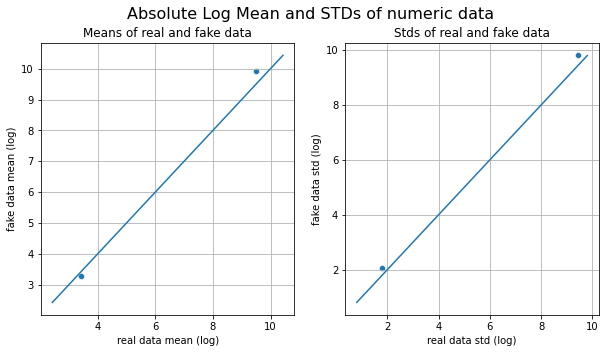

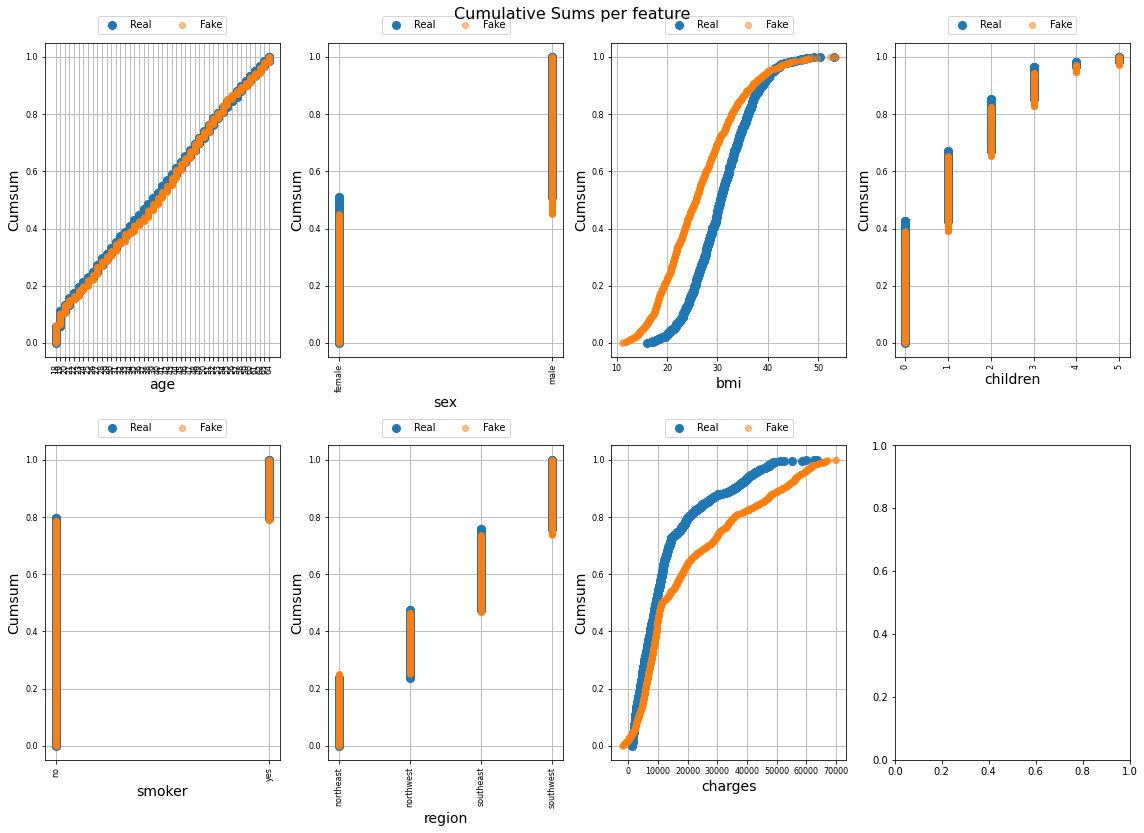

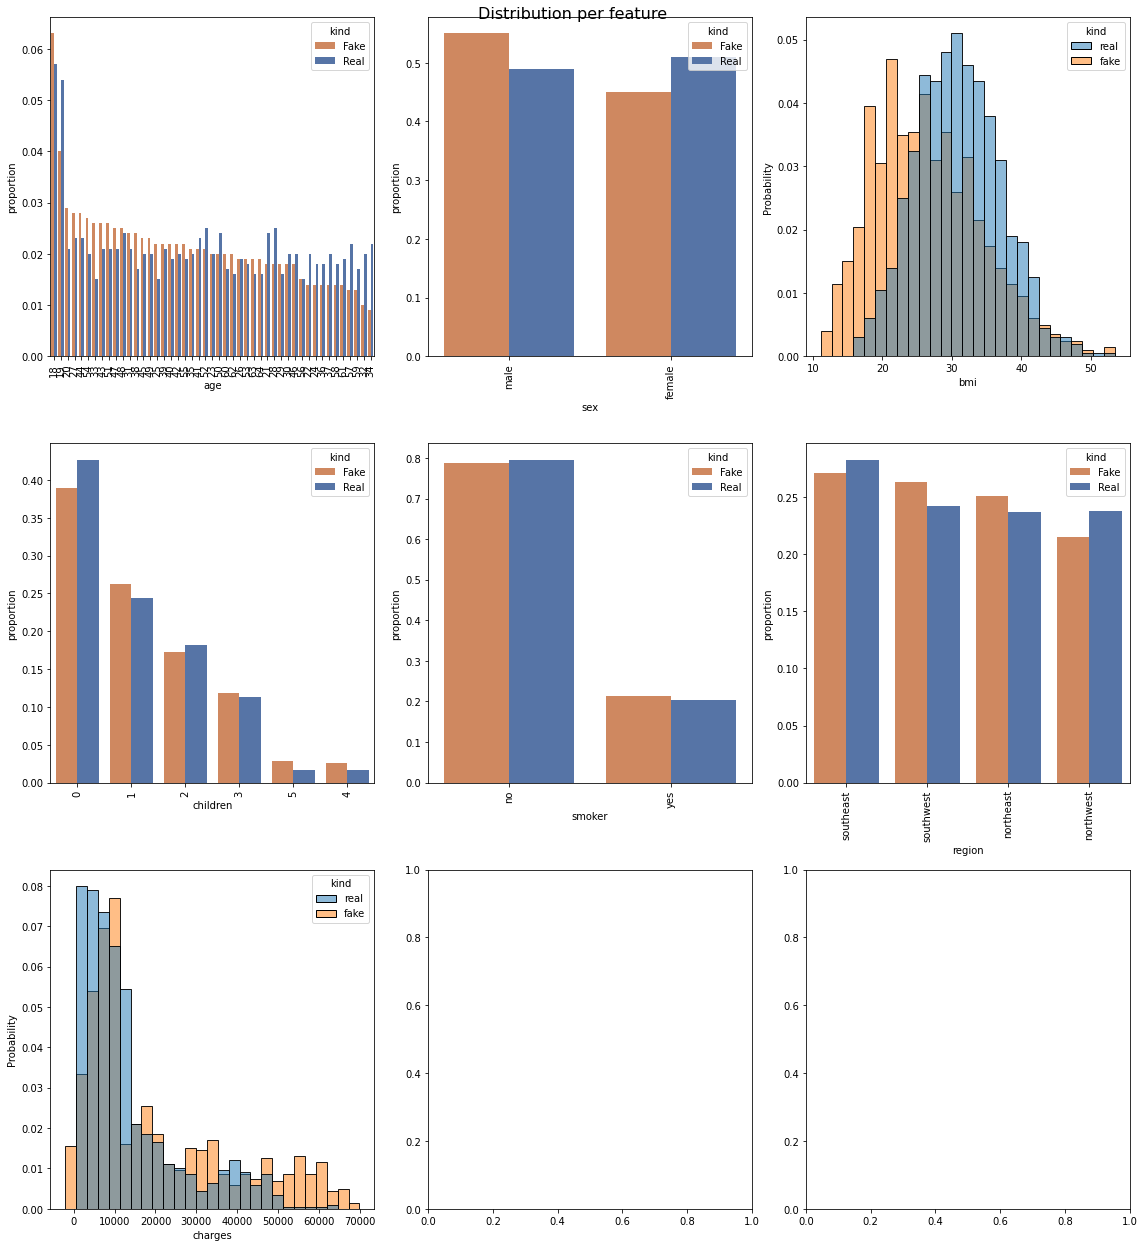

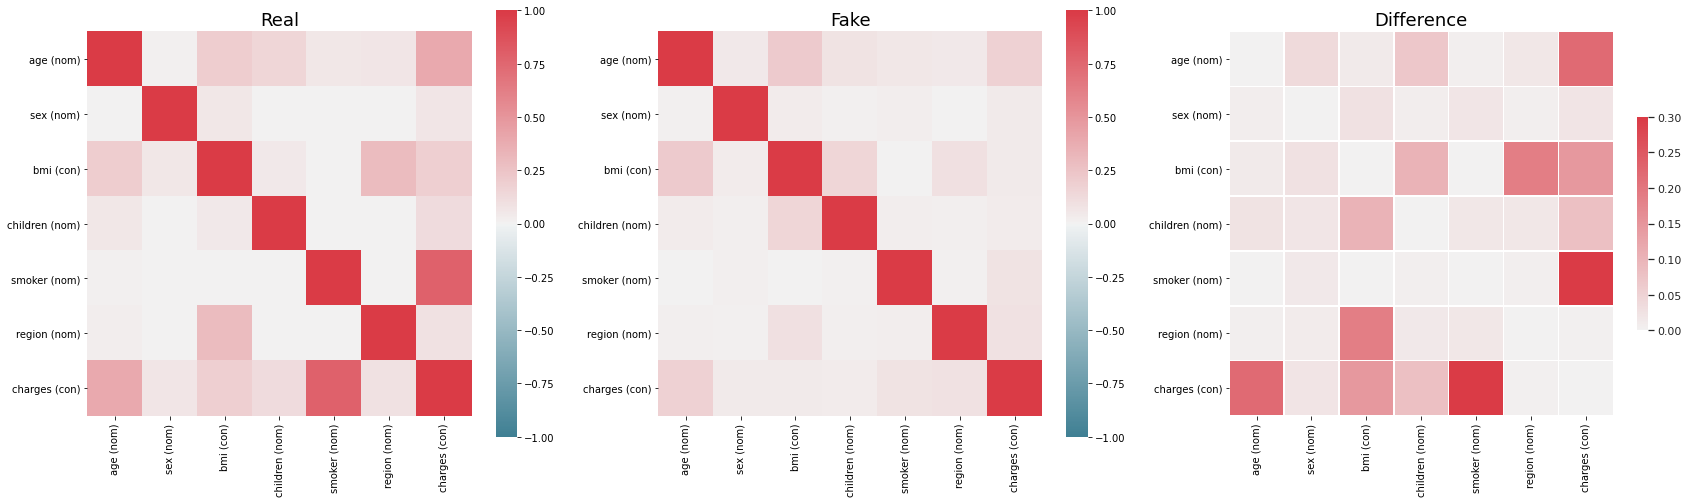

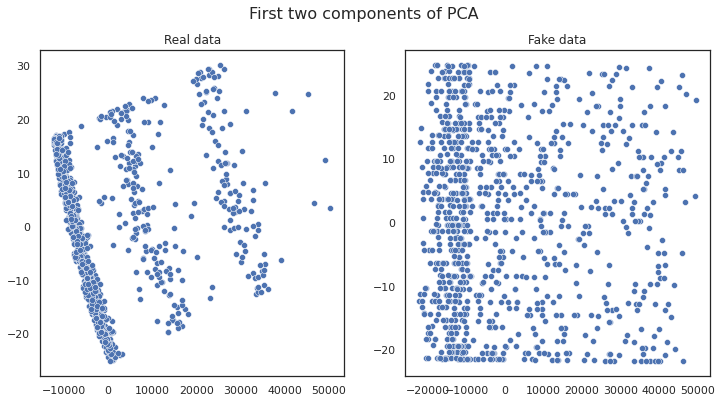

In [ ]:
table_evaluator=TableEvaluator(data, samples, cat_cols=categorical_features)

table_evaluator.visual_evaluation()

# Conclusions

Conclusions: 
*   CTGAN offers a very simple way of synthetic data
*   Table evaluator visualizes data very quickly 
*   Categorical data converges faster than numeric data







